In [76]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
pip install pyforest

In [0]:
import pyforest

# Data Understanding

**Import the data set in Python and	View the dataset**

In [79]:
df = pd.read_csv('/content/drive/My Drive/Wipro AIML/ML NLP L1 (1B)/Final Assignment/Melbourne_housing_FULL.csv')
df.head()

<IPython.core.display.Javascript object>

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


**See the structure and the summary of the dataset to understand the data**

In [80]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [81]:
df.shape

(34857, 21)

In [82]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


**Find out the number of:<br>
	     a.) Numeric attributes:<br>
	     b.) Categorical attributes:**


In [83]:
pd.DataFrame(df.info())

<IPython.core.display.Javascript object>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

""


**Number of Numerical Attributes : 13**

**Number of object type : 8**

#  Data Preparation : Data Cleaning

**Duplicate values**

In [84]:
df.shape

(34857, 21)

In [85]:
df[df.duplicated(keep = False)]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
15857,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.4,3131.0,3.0,3.0,2.0,405.0,226.0,2000.0,Manningham City Council,-37.82678,145.16777,Eastern Metropolitan,4973.0
15858,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.4,3131.0,3.0,3.0,2.0,405.0,226.0,2000.0,Manningham City Council,-37.82678,145.16777,Eastern Metropolitan,4973.0


In [0]:
df.drop(15857 , axis = 0 , inplace= True)

In [87]:
df.shape

(34856, 21)

In [88]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [89]:
df.head(3)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0


In [90]:
df.groupby('SellerG').mean()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
SellerG,,,,,,,,,,,,,
@Realty,3.666667,7.200455e+05,18.166667,3074.416667,3.571429,1.714286,2.000000,763.285714,147.250000,1971.000000,-37.727793,145.028410,9403.833333
A,3.000000,NaN,17.400000,3048.000000,3.000000,2.000000,1.000000,NaN,NaN,NaN,-37.642500,144.912800,4704.000000
AIME,4.000000,9.800000e+05,12.200000,3147.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2894.000000
ASL,3.600000,1.227100e+06,12.080000,3086.200000,3.600000,1.800000,1.600000,637.500000,303.000000,1977.000000,-37.747146,145.055228,10859.000000
Abercromby's,3.244898,2.041424e+06,5.673469,3139.489796,3.421053,2.157895,1.894737,454.162162,201.954545,1959.181818,-37.846865,145.022298,9148.530612
...,...,...,...,...,...,...,...,...,...,...,...,...,...
iOne,3.000000,6.200000e+05,7.000000,3013.000000,3.000000,3.000000,1.000000,0.000000,141.000000,2014.000000,-37.819400,144.882600,6543.000000
iProperty,3.000000,8.200000e+05,17.200000,3133.000000,3.000000,2.000000,2.000000,277.000000,125.000000,2016.000000,-37.835810,145.198020,4181.000000
iSell,3.062500,7.231600e+05,21.946875,3172.437500,3.100000,1.500000,2.150000,577.000000,111.025000,1971.222222,-37.961042,145.163263,8701.156250


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34856 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34856 non-null  object 
 1   Address        34856 non-null  object 
 2   Rooms          34856 non-null  int64  
 3   Type           34856 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34856 non-null  object 
 6   SellerG        34856 non-null  object 
 7   Date           34856 non-null  object 
 8   Distance       34855 non-null  float64
 9   Postcode       34855 non-null  float64
 10  Bedroom2       26639 non-null  float64
 11  Bathroom       26630 non-null  float64
 12  Car            26128 non-null  float64
 13  Landsize       23046 non-null  float64
 14  BuildingArea   13741 non-null  float64
 15  YearBuilt      15550 non-null  float64
 16  CouncilArea    34853 non-null  object 
 17  Lattitude      26880 non-null  float64
 18  Longti

In [92]:
df.Date = pd.to_datetime(df.Date)

<IPython.core.display.Javascript object>

In [0]:
df.Type = df.Type.astype('category')

In [0]:
df.Method = df.Method.astype('category')

In [0]:
df.CouncilArea = df.CouncilArea.astype('category')

In [0]:
df.Regionname = df.Regionname.astype('category')

In [0]:
df.SellerG = df.SellerG.astype('category')

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34856 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         34856 non-null  object        
 1   Address        34856 non-null  object        
 2   Rooms          34856 non-null  int64         
 3   Type           34856 non-null  category      
 4   Price          27247 non-null  float64       
 5   Method         34856 non-null  category      
 6   SellerG        34856 non-null  category      
 7   Date           34856 non-null  datetime64[ns]
 8   Distance       34855 non-null  float64       
 9   Postcode       34855 non-null  float64       
 10  Bedroom2       26639 non-null  float64       
 11  Bathroom       26630 non-null  float64       
 12  Car            26128 non-null  float64       
 13  Landsize       23046 non-null  float64       
 14  BuildingArea   13741 non-null  float64       
 15  YearBuilt      1555

In [99]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7609
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

<IPython.core.display.Javascript object>

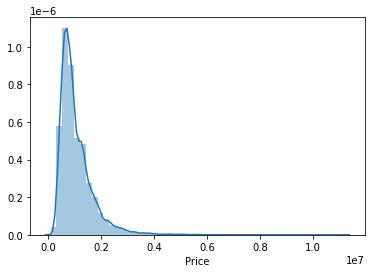

In [100]:
sns.distplot(df.Price)

In [101]:
df.Price.describe()

count    2.724700e+04
mean     1.050173e+06
std      6.414671e+05
min      8.500000e+04
25%      6.350000e+05
50%      8.700000e+05
75%      1.295000e+06
max      1.120000e+07
Name: Price, dtype: float64

In [0]:
df.Price = df.Price.interpolate(method ='linear', limit_direction ='forward')

In [0]:
df.Price.fillna(df.Price.median() , inplace = True)

In [104]:
df[df.isnull()['Distance']]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
29483,Fawkner Lot,1/3 Brian St,3,h,616000.0,SP,Brad,2018-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
df[df.isnull()['Distance']].index.values

array([29483])

In [0]:
df.drop(df[df.isnull()['Distance']].index.values , axis= 0 , inplace=True)

In [107]:
df[df.isnull()['CouncilArea']]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
18523,Footscray,2/16 Stafford St,2,u,710000.0,S,Jas,2017-07-15,5.1,3011.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26888,Camberwell,2/3 Kingsley St,2,h,825000.0,VB,Jellis,2017-11-11,7.7,3124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
df[df.isnull()['CouncilArea']].index.values

array([18523, 26888])

In [0]:
df.drop(df[df.isnull()['CouncilArea']].index.values , axis= 0 , inplace=True)

In [110]:
df.Bedroom2.median()

3.0

In [0]:
df.Bedroom2.fillna(df.Bedroom2.median() , inplace = True)

In [112]:
df.Bathroom.median()

2.0

In [0]:
df.Bathroom.fillna(df.Bathroom.median() , inplace =  True)

<IPython.core.display.Javascript object>

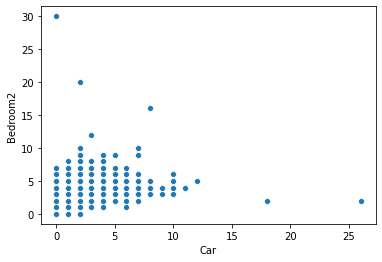

In [114]:
sns.scatterplot(df.Car , df.Bedroom2)

In [0]:
df.Car = df.Car.interpolate(method ='linear', limit_direction ='forward')

In [0]:
df.Landsize = df.Landsize.interpolate(method ='linear', limit_direction ='forward')

In [0]:
df.BuildingArea.fillna(df.BuildingArea.median() , inplace = True)

In [0]:
df.YearBuilt.fillna(df.YearBuilt.median() , inplace = True)

In [0]:
df.Lattitude = df.Lattitude.interpolate(method ='linear', limit_direction ='forward')

In [0]:
df.Longtitude = df.Longtitude.interpolate(method ='linear', limit_direction ='forward')

In [121]:
df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [122]:
df.shape

(34853, 21)

In [0]:
from scipy.stats import zscore

In [124]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Rooms                 2.0000
Price            656000.0000
Distance              7.6000
Postcode            105.0000
Bedroom2              0.0000
Bathroom              1.0000
Car                   1.0000
Landsize            389.0000
BuildingArea          0.0000
YearBuilt             0.0000
Lattitude             0.1098
Longtitude            0.1319
Propertycount      6027.0000
dtype: float64


In [0]:
x = df.Price

In [126]:
x.shape

(34853,)

In [127]:
x = x[x.between(x.quantile(.15), x.quantile(.85))] # without outliers

print(x)

0         900000.0
1        1480000.0
2        1035000.0
3        1250000.0
4        1465000.0
           ...    
34852    1480000.0
34853     888000.0
34854     705000.0
34855    1140000.0
34856    1020000.0
Name: Price, Length: 24439, dtype: float64


In [128]:
x.shape

(24439,)

In [129]:
x.index.values

array([    0,     1,     2, ..., 34854, 34855, 34856])

In [130]:
df.shape

(34853, 21)

In [131]:
df.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            34847, 34848, 34849, 34850, 34851, 34852, 34853, 34854, 34855,
            34856],
           dtype='int64', length=34853)

In [132]:
x.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            34846, 34848, 34849, 34850, 34851, 34852, 34853, 34854, 34855,
            34856],
           dtype='int64', length=24439)

In [133]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,900000.0,SS,Jellis,2016-03-09,2.5,3067.0,2.0,1.0,1.0,126.0,136.0,1970.0,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,2.0,1.0,1.0,202.0,136.0,1970.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,1250000.0,VB,Rounds,2016-04-02,2.5,3067.0,3.0,2.0,1.0,0.0,136.0,1970.0,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [134]:
df.loc[[1 , 2]]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,2.0,1.0,1.0,202.0,136.0,1970.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0


**Outlier removed df**

In [135]:
df_outlier_removed = df.loc[list(x.index)]
df_outlier_removed.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,900000.0,SS,Jellis,2016-03-09,2.5,3067.0,2.0,1.0,1.0,126.0,136.0,1970.0,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,2.0,1.0,1.0,202.0,136.0,1970.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,1250000.0,VB,Rounds,2016-04-02,2.5,3067.0,3.0,2.0,1.0,0.0,136.0,1970.0,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


# Data Preparation Feature Engineering:

**Feature Transformation**

<IPython.core.display.Javascript object>

/usr/local/lib/python3.6/dist-packages/pyforest/__init__.py:2: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  from ._imports import *


<IPython.core.display.Javascript object>

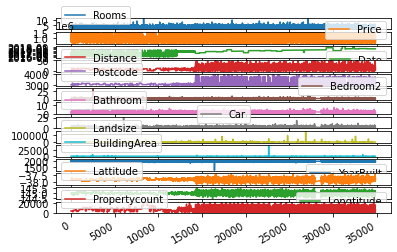

In [136]:
df_outlier_removed.plot(subplots = True)
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>

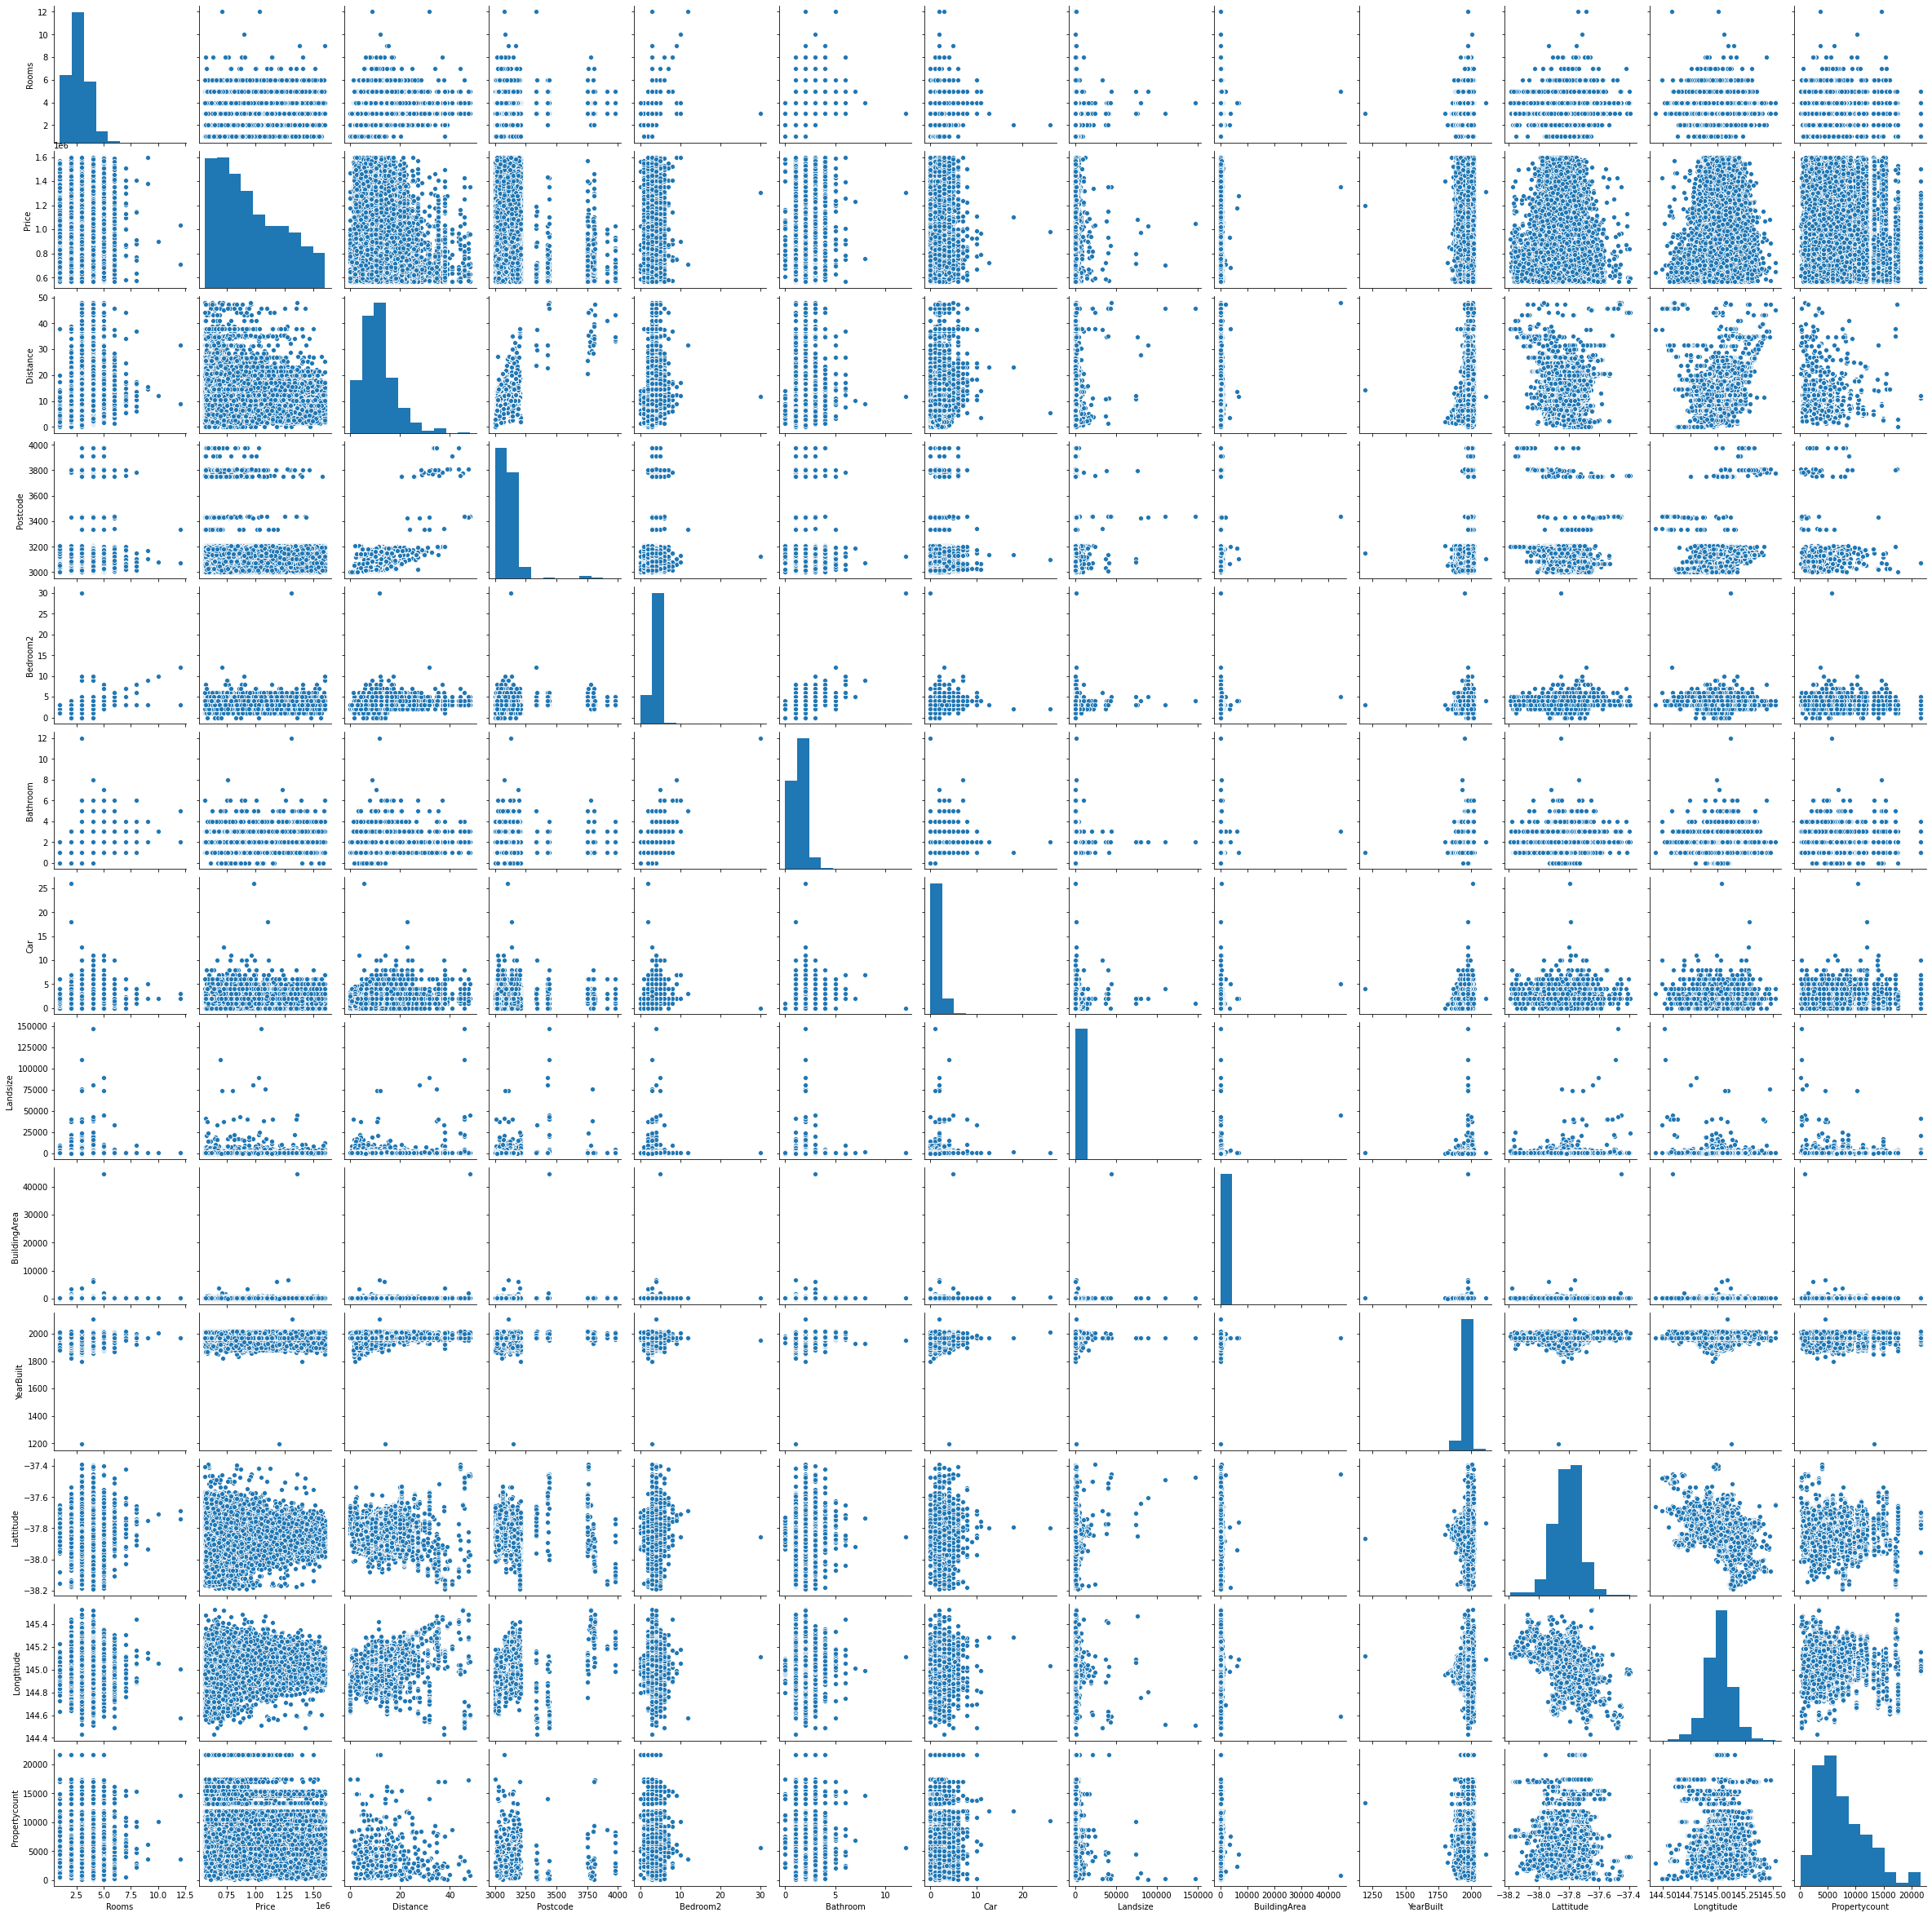

In [137]:
 sns.pairplot(df_outlier_removed)

Latitude and longitude has inverse relationship

In [138]:
df_outlier_removed.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

<IPython.core.display.Javascript object>

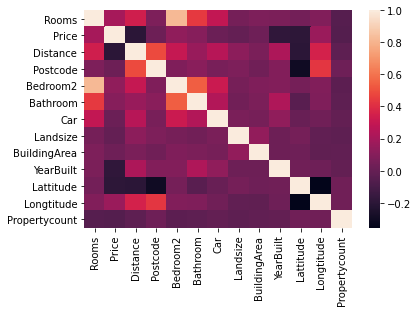

In [139]:
sns.heatmap(df_outlier_removed.corr())

Bedrooms2 and Rooms are positively correlated , latitude and postcode are negatively correlated

In [0]:
from sklearn import preprocessing

In [141]:
df_outlier_removed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24439 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         24439 non-null  object        
 1   Address        24439 non-null  object        
 2   Rooms          24439 non-null  int64         
 3   Type           24439 non-null  category      
 4   Price          24439 non-null  float64       
 5   Method         24439 non-null  category      
 6   SellerG        24439 non-null  category      
 7   Date           24439 non-null  datetime64[ns]
 8   Distance       24439 non-null  float64       
 9   Postcode       24439 non-null  float64       
 10  Bedroom2       24439 non-null  float64       
 11  Bathroom       24439 non-null  float64       
 12  Car            24439 non-null  float64       
 13  Landsize       24439 non-null  float64       
 14  BuildingArea   24439 non-null  float64       
 15  YearBuilt      2443

In [142]:
df_outlier_removed.drop(['Suburb','Address' , 'Type' , 'Method' , 'Date' ,  'SellerG' , 'CouncilArea' , 'Regionname'] , axis = 1)

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,2,900000.0,2.5,3067.0,2.0,1.0,1.0,126.0,136.0,1970.0,-37.80140,144.995800,4019.0
1,2,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,136.0,1970.0,-37.79960,144.998400,4019.0
2,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.993400,4019.0
3,3,1250000.0,2.5,3067.0,3.0,2.0,1.0,0.0,136.0,1970.0,-37.81140,145.011600,4019.0
4,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.80930,144.994400,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,4,1480000.0,6.3,3013.0,4.0,1.0,3.0,593.0,136.0,1970.0,-37.81053,144.884670,6543.0
34853,2,888000.0,6.3,3013.0,2.0,2.0,1.0,98.0,104.0,2018.0,-37.81551,144.888260,6543.0
34854,2,705000.0,6.3,3013.0,2.0,1.0,2.0,220.0,120.0,2000.0,-37.82286,144.878560,6543.0
34855,3,1140000.0,6.3,3013.0,3.0,2.0,1.0,235.0,136.0,1970.0,-37.82048,144.886035,6543.0


**Standardization**

In [0]:
# Scaling

df = preprocessing.normalize(df_outlier_removed.drop(['Suburb','Address' , 'Type' , 'Method' , 'SellerG' , 'Date' ,  'CouncilArea' , 'Regionname'] , axis = 1))

In [144]:
df = preprocessing.scale(df)
df

array([[-0.95389914,  0.32883746, -1.0879886 , ...,  0.06387102,
        -0.06347746, -0.65224718],
       [-1.65316569,  0.40576272, -1.1991856 , ...,  1.45265752,
        -1.45078833, -0.93645623],
       [-1.18663558,  0.35947796, -1.12499823, ...,  0.52553595,
        -0.52527906, -0.74684029],
       ...,
       [-0.46043757,  0.07329886, -0.45894554, ..., -0.91866971,
         0.91189942,  0.1297315 ],
       [-0.62520688,  0.30679911, -0.80722817, ...,  0.80848948,
        -0.81090688, -0.44535744],
       [-1.16383816,  0.27138908, -0.74081861, ...,  0.47941075,
        -0.48220153, -0.33570109]])

In [0]:
# drop_enc.categories_

**Dummy encoding**

In [146]:
# Dummy Variable 

pd.get_dummies(df_outlier_removed)

<IPython.core.display.Javascript object>

,Rooms,Price,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Suburb_Abbotsford,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,Suburb_Albert Park,Suburb_Albion,Suburb_Alphington,Suburb_Altona,Suburb_Altona Meadows,Suburb_Altona North,Suburb_Ardeer,Suburb_Armadale,Suburb_Ascot Vale,Suburb_Ashburton,Suburb_Ashwood,Suburb_Aspendale,Suburb_Aspendale Gardens,Suburb_Attwood,Suburb_Avondale Heights,Suburb_Avonsleigh,Suburb_Balaclava,Suburb_Balwyn,Suburb_Balwyn North,Suburb_Bayswater,Suburb_Bayswater North,Suburb_Beaconsfield,...,CouncilArea_Bayside City Council,CouncilArea_Boroondara City Council,CouncilArea_Brimbank City Council,CouncilArea_Cardinia Shire Council,CouncilArea_Casey City Council,CouncilArea_Darebin City Council,CouncilArea_Frankston City Council,CouncilArea_Glen Eira City Council,CouncilArea_Greater Dandenong City Council,CouncilArea_Hobsons Bay City Council,CouncilArea_Hume City Council,CouncilArea_Kingston City Council,CouncilArea_Knox City Council,CouncilArea_Macedon Ranges Shire Council,CouncilArea_Manningham City Council,CouncilArea_Maribyrnong City Council,CouncilArea_Maroondah City Council,CouncilArea_Melbourne City Council,CouncilArea_Melton City Council,CouncilArea_Mitchell Shire Council,CouncilArea_Monash City Council,CouncilArea_Moonee Valley City Council,CouncilArea_Moorabool Shire Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,2,900000.0,2016-03-09,2.5,3067.0,2.0,1.0,1.0,126.0,136.0,1970.0,-37.80140,144.995800,4019.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
1,2,1480000.0,2016-03-12,2.5,3067.0,2.0,1.0,1.0,202.0,136.0,1970.0,-37.79960,144.998400,4019.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,2,1035000.0,2016-04-02,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.993400,4019.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,3,1250000.0,2016-04-02,2.5,3067.0,3.0,2.0,1.0,0.0,136.0,1970.0,-37.81140,145.011600,4019.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,3,1465000.0,2017-04-03,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.80930,144.994400,4019.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,4,1480000.0,2018-02-24,6.3,3013.0,4.0,1.0,3.0,593.0,136.0,1970.0,-37.81053,144.884670,6543.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
34853,2,888000.0,2018-02-24,6.3,3013.0,2.0,2.0,1.0,98.0,104.0,2018.0,-37.81551,144.888260,6543.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
34854,2,705000.0,2018-02-24,6.3,3013.0,2.0,1.0,2.0,220.0,120.0,2000.0,-37.822